***Chapter 02. SGD Classifier***

In [17]:
import pandas as pd
df = pd.read_csv("Fish.csv")
df.head(3)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961


In [18]:
x = df[["Weight", "Length2", "Length3", "Height", "Width"]]
y = df["Species"]

print(x.shape)

(159, 5)


In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                  random_state=42)

print(x_train.shape)
print(x_test.shape)

(119, 5)
(40, 5)


In [20]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()


ss.fit(x_train) # mean, std

x_train_scaled = ss.transform(x_train)
x_test_scaled = ss.transform(x_test)

In [21]:
from sklearn.linear_model import SGDClassifier # 회귀와 분류 모두 적용 ㄱㄴ

# SGDClassifier의 매개변수
# 1) 'loss' (문자열 형태로 값을 지정해야 함)
#           = "log_loss" --> 로지스틱 회귀 모델! <- L2
#           = "hinge" --> Support Vector Machine (SVM)
# 2) max_iter <-- 최대 epoch 값을 설정하는 매개변수! (iteration)
# 3) tol <-- tolerance (n. 관용, 허용) <-- 학습 종료를 위한 조건과 관련된 매개변수
# 4) random_state = 42
# 5) penalty <-- 규제 방식 ('L1', 'L2')

sc = SGDClassifier(loss="log_loss",
                   max_iter=10, # max_iter 기본값=1000
                   random_state=42)

sc.fit(x_train_scaled, y_train) # y_train을 통째로 던져 줌(이미 모든 정답값이 y_train에 저장되어 있음)

# 과소적합이 발생함! (학습 < 시험)
print("학습용:", sc.score(x_train_scaled, y_train))
print("시험용:", sc.score(x_test_scaled, y_test))

학습용: 0.773109243697479
시험용: 0.775


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [22]:
# 점진적 학습(=온라인 학습)
# partial_fit(new_x, new_y) 원래는 새로 들어온 데이터를 학습시킴
# -> 실습에서는 새로 들어온 데이터가 없는 상황이라 기존 데이터를 활용했음!
# 1 Epoch만큼 학습을 함!

sc.partial_fit(x_train_scaled, y_train) # 이 부분만 계속 새로고침 하면서 학습시키면
# 1 Epoch만큼 튜닝하면서 스코어값이 조금씩 상승함

print("학습용:", sc.score(x_train_scaled, y_train))
print("시험용:", sc.score(x_test_scaled, y_test))

학습용: 0.8151260504201681
시험용: 0.8


***Chapter 03. 에포크와 과대/과소적합***

In [23]:
import numpy as np

print(np.unique(y_train))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [24]:
sc = SGDClassifier(loss="log_loss",
                   #max_iter=10, # max_iter 없애야 함!
                   random_state=42)

train_score = []
test_score = []

for i in range(300):
    sc.partial_fit(x_train_scaled, y_train, # 1 Epoch만큼 동작
                   classes=np.unique(y_train))
    
    # 학습용 그래프랑 시험용 데이터 저장!
    train_score.append(sc.score(x_train_scaled, y_train)) # 학습용 그래프!
    test_score.append(sc.score(x_test_scaled, y_test)) # 시험용 그래프!

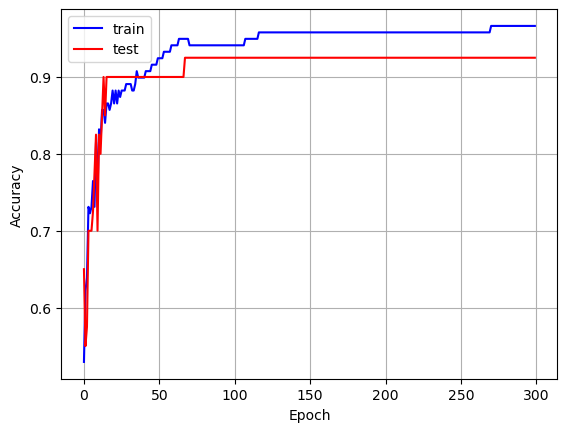

In [25]:
import matplotlib.pyplot as plt

plt.figure()
# 선을 2개 그릴 거라서 plt.plot()을 2번 호출
plt.plot(train_score, label="train", color="blue")
plt.plot(test_score, label="test", color="red")
plt.legend()
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

In [26]:
sc = SGDClassifier(loss="log_loss",
                   max_iter=100, # max_iter 기본값=1000
                   tol=None, # 기본값 = 1e-3 = 0.001 (학습을 종료시키기 위한 매개변수)
                             # None --> 무시하고 max_iter까지 강제적으로 계속 학습해라
                   random_state=42)

# 현재 epoch, 직전 epoch -> |score현 - score직| < 0.001 (=tol) : 더 이상 학습시킬 필요 없음
# --> Early Stopping으로 컴퓨터가 스스로 최적의 Epoch값 찾을 수 있음

sc.fit(x_train_scaled, y_train)

print("학습용:", sc.score(x_train_scaled, y_train))
print("시험용:", sc.score(x_test_scaled, y_test))

학습용: 0.957983193277311
시험용: 0.925


In [27]:
# hinge 사용하면 Support Vector Machine (SVM)
sc = SGDClassifier(loss="hinge",
                   max_iter=100, # max_iter 기본값=1000
                   tol=None, # 1e-3 = 0.001 (학습을 종료시키기 위한 매개변수)
                   random_state=42)

# 현재 epoch, 직전 epoch -> |score현 - score직| < 0.001 (=tol) : 더 이상 학습시킬 필요 없음

sc.fit(x_train_scaled, y_train)

print("학습용:", sc.score(x_train_scaled, y_train))
print("시험용:", sc.score(x_test_scaled, y_test))

# 일반적으로 로지스틱 회귀보다 SVM의 성능이 더 좋다

학습용: 0.9495798319327731
시험용: 0.925
